In [1]:
import pandas as pd

In [2]:
entities_df = pd.read_csv('../data/ChristmasCarol/processed_characters.csv')
tokens_df = pd.read_csv('../data/ChristmasCarol/character-tagging/ChristmasCarol.tokens', delimiter='\t')
entities_df

,Unnamed: 0,COREF,start_token,end_token,prop,cat,text,character_name
0,0,14,0,3,PROP,PER,MARLEY 'S GHOST Marley,MARLEY 'S GHOST Marley
1,6,20,41,41,PROP,PER,Scrooge,Mr. Ebenezer Scrooge
2,7,20,46,46,PROP,PER,Scrooge,Mr. Ebenezer Scrooge
3,8,20,56,56,PRON,PER,he,Mr. Ebenezer Scrooge
4,9,20,60,60,PRON,PER,his,Mr. Ebenezer Scrooge
...,...,...,...,...,...,...,...,...
1970,4729,58,35876,35876,PRON,PER,He,poor Tiny Tim
1971,4730,66,35882,35882,PROP,PER,Spirits,THE SPIRITS The Phantom
1972,4731,58,35901,35901,PRON,PER,him,poor Tiny Tim
1973,4732,58,35903,35903,PRON,PER,he,poor Tiny Tim


In [3]:
tokens_df

,paragraph_ID,sentence_ID,token_ID_within_sentence,token_ID_within_document,word,lemma,byte_onset,byte_offset,POS_tag,fine_POS_tag,dependency_relation,syntactic_head_ID,event
0,0,0,0,0,MARLEY,MARLEY,0,6,PROPN,NNP,compound,3,O
1,0,0,1,1,'S,'s,6,8,PART,POS,compound,2,O
2,0,0,2,2,GHOST,GHOST,9,14,PROPN,NNP,compound,3,O
3,1,0,3,3,Marley,Marley,17,23,PROPN,NNP,nsubj,4,O
4,1,0,4,4,was,be,24,27,AUX,VBD,ROOT,4,O
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35942,712,1806,10,35942,Us,we,157762,157764,PRON,PRP,dobj,35941,O
35943,712,1806,11,35943,",",",",157764,157765,PUNCT,",",punct,35941,O
35944,712,1806,12,35944,Every,every,157766,157771,DET,DT,det,35945,O
35945,712,1806,13,35945,One,one,157772,157775,NUM,CD,npadvmod,35941,O


In [4]:
character_of_interest = 'Mr. Ebenezer Scrooge'
token_window = 25

In [5]:
mentions_df = entities_df[entities_df.character_name == character_of_interest]
mentions_df

,Unnamed: 0,COREF,start_token,end_token,prop,cat,text,character_name
1,6,20,41,41,PROP,PER,Scrooge,Mr. Ebenezer Scrooge
2,7,20,46,46,PROP,PER,Scrooge,Mr. Ebenezer Scrooge
3,8,20,56,56,PRON,PER,he,Mr. Ebenezer Scrooge
4,9,20,60,60,PRON,PER,his,Mr. Ebenezer Scrooge
7,24,20,176,176,PROP,PER,Scrooge,Mr. Ebenezer Scrooge
...,...,...,...,...,...,...,...,...
1950,4691,20,35647,35647,PRON,PER,I,Mr. Ebenezer Scrooge
1956,4699,20,35695,35695,PRON,PER,i,Mr. Ebenezer Scrooge
1958,4701,20,35701,35701,PROP,PER,Scrooge,Mr. Ebenezer Scrooge
1959,4702,20,35705,35705,PRON,PER,his,Mr. Ebenezer Scrooge


In [6]:
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


sentiment_predictor = SentimentIntensityAnalyzer()

In [7]:
import string
sentiments_by_mentions = []


for _, row in mentions_df.iterrows():
    mention_tokens = []
    for _, token_row in tokens_df[max(row.start_token - token_window, 0):min(row.end_token + token_window, len(tokens_df) - 1)].iterrows():
        if isinstance(token_row.word, str) and token_row.word != '\t' and token_row.word not in string.punctuation:
            mention_tokens.append(token_row.word)
    try:
        polarity = sentiment_predictor.polarity_scores(' '.join(mention_tokens))['compound']
    except:
        print(mention_tokens)
    sentiments_by_mentions.append(polarity)

In [8]:
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (25., 10.)

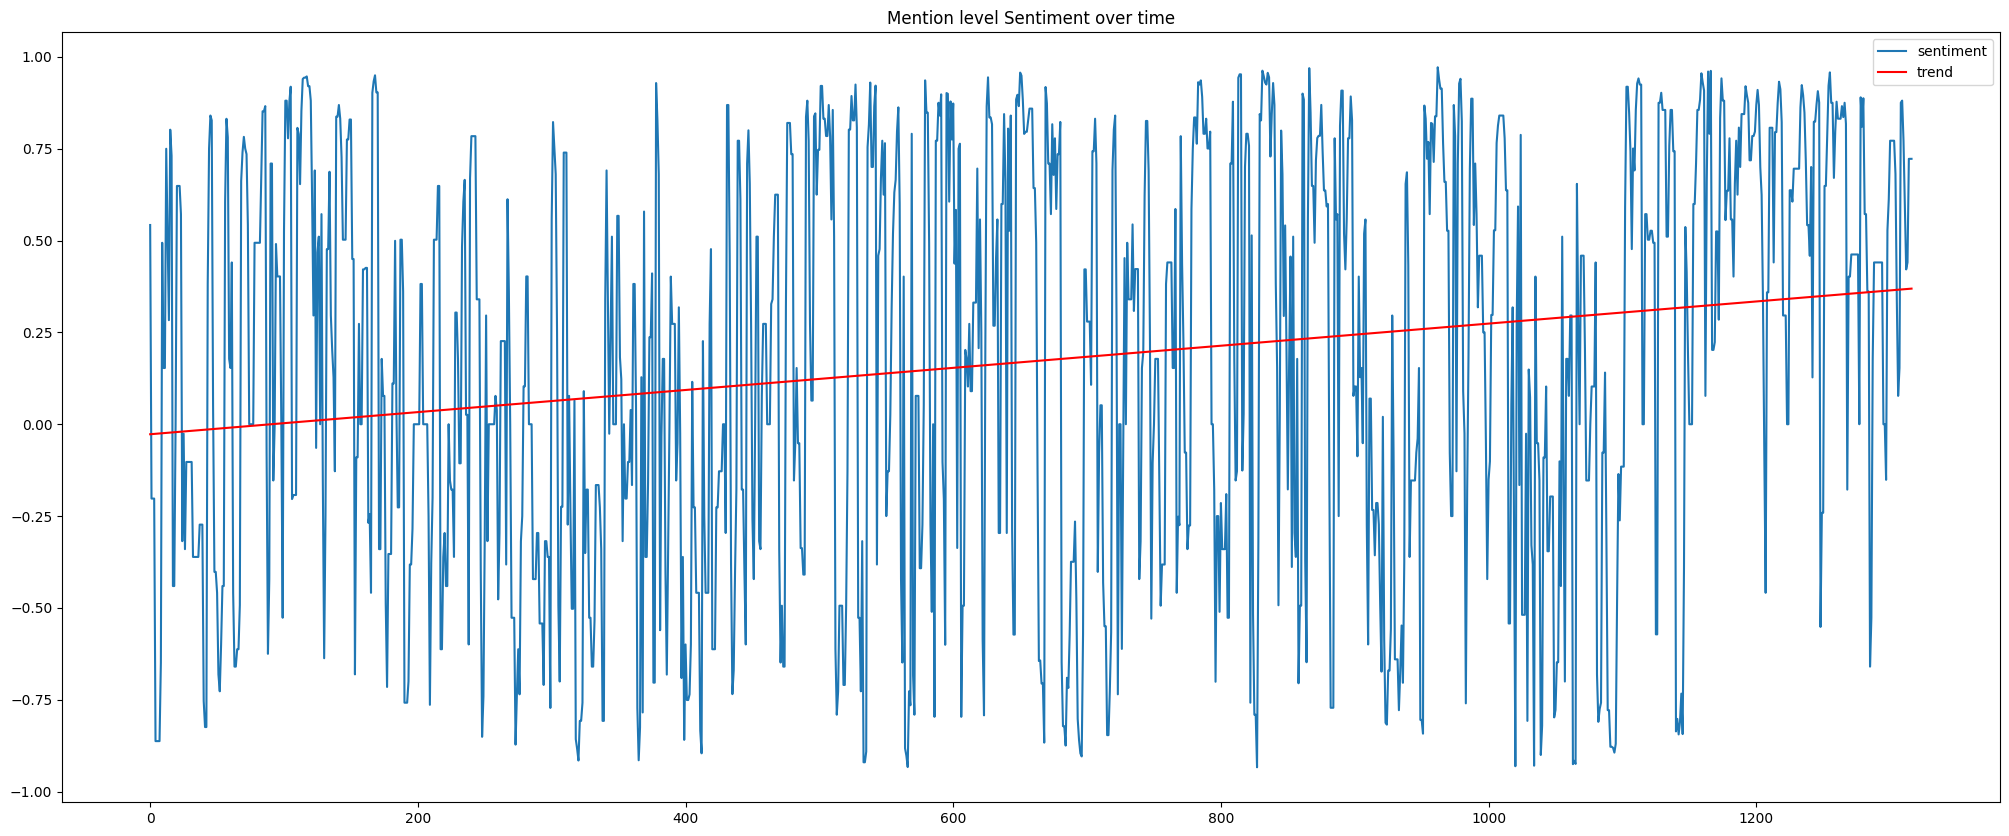

In [9]:
x = np.arange(len(sentiments_by_mentions))
slope, intercept = np.polyfit(x, sentiments_by_mentions, 1)

plt.plot(x, sentiments_by_mentions, label='sentiment')
plt.plot(x, slope*x + intercept, color='red', label='trend')
plt.title('Mention level Sentiment over time')
plt.legend()
plt.show()

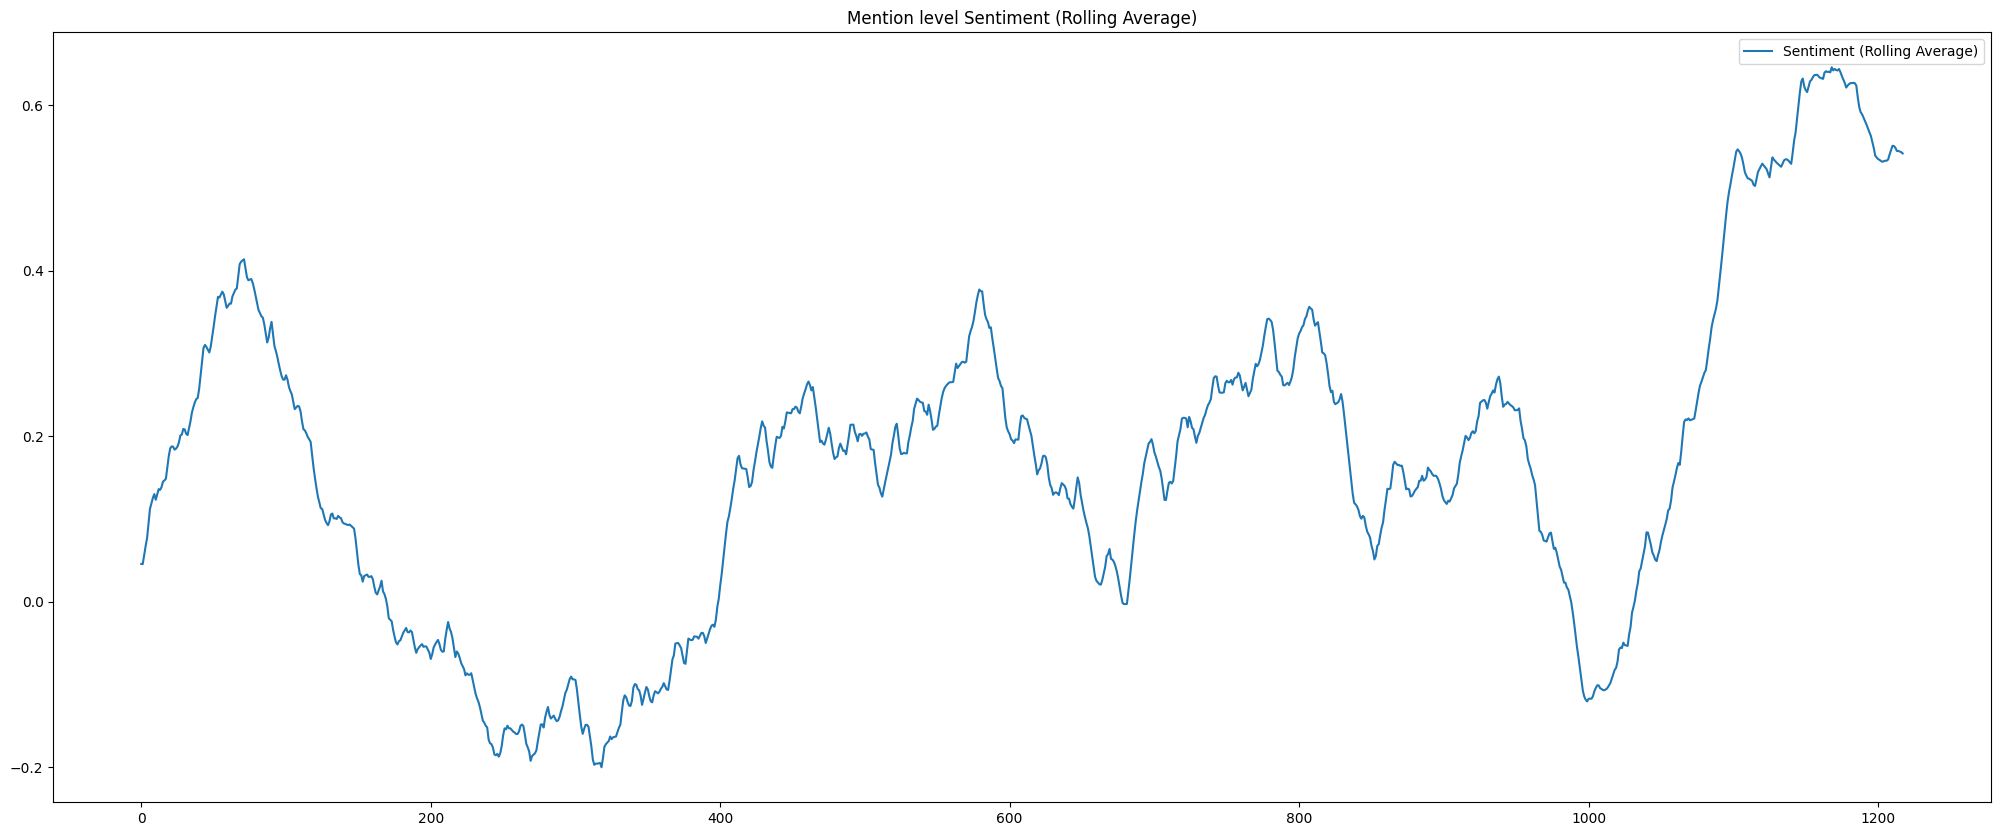

In [11]:
N = 100
rolling_average = pd.Series(sentiments_by_mentions).rolling(window=N).mean().iloc[N-1:].values

x = np.arange(len(rolling_average))

plt.plot(x, rolling_average, label='Sentiment (Rolling Average)')
plt.title('Mention level Sentiment (Rolling Average)')
plt.legend()
plt.show()